In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from kitikiplot import KitikiPlot
import pandas as pd

os.chdir("..")

In [2]:
df= pd.read_excel( "datasets/air+quality/AirQualityUCI.xlsx" ) 
print("Shape : ", df.shape)
df.head(3)

Shape :  (9357, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.9,53.975000,0.750239


In [3]:
df= df[ df['Date']== "2004-11-01" ]
print("Shape : ", df.shape)
df.head( 3 )

Shape :  (24, 15)


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
5646,2004-11-01,00:00:00,3.2,1352.5,-200,15.864362,1175.5,318.0,583.50,69.0,1723.0,2149.75,20.075,71.299999,1.656382
5647,2004-11-01,01:00:00,3.7,1406.5,-200,17.848492,1235.0,338.0,547.75,77.0,1780.0,2519.25,20.050,71.125000,1.649795
5648,2004-11-01,02:00:00,3.5,1333.0,-200,16.685885,1200.5,353.0,552.00,68.0,1767.0,1925.25,19.625,73.200001,1.654350


In [4]:
df["CO(GT)"]= df["CO(GT)"].astype(int)

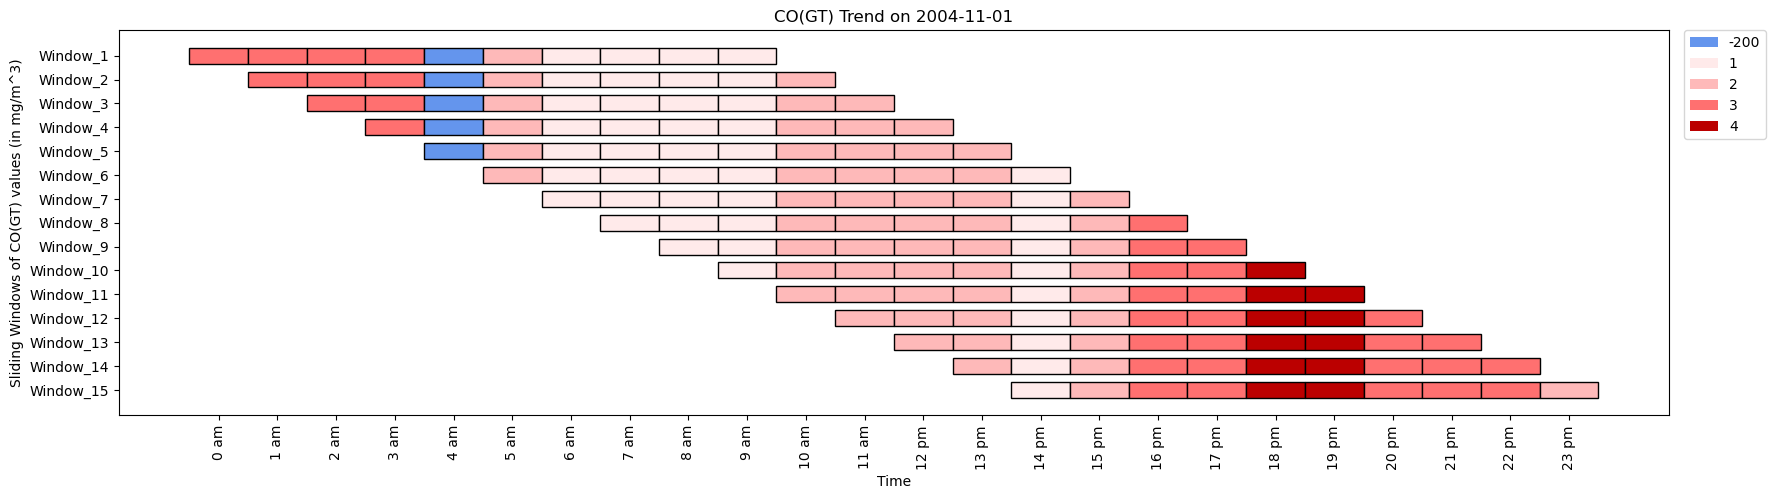

In [6]:
ktk= KitikiPlot( data= df["CO(GT)"].values.tolist() )

ktk.plot(
        figsize= (20, 5),
        cell_width= 2,
        cmap= {-200: "cornflowerblue", 1: "#ffeaea", 2: "#feb9b9", 3: "#ff7070", 4: "#b00"},
        transpose= True,
        xlabel= "Time",
        ylabel= "Sliding Windows of CO(GT) values (in mg/m^3)",
        display_xticks= True,
        xticks_values= [(str(i.hour)+" "+i.strftime("%p").lower()) for i in  pd.to_datetime(df["Time"], format='%H:%M:%S')],
        ytick_prefix= "Window",
        xticks_rotation= 90, 
        display_legend= True,
        title= "CO(GT) Trend on 2004-11-01",
        legend_kwargs= {"bbox_to_anchor": (1.01, 1), "loc":'upper left', "borderaxespad": 0.})